## Welcome to Day 11 - Homework!

### Day11HW_Muhammad Noorrosyid Sulaksono

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('C:/Users/rosyi/Videos/Machine Learning/Day 11. Hands On Exploratory Data Analysis with Python I/housepricesdata.csv')

Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda. 
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

In [97]:
df.head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


In [99]:
df[df['Unit_Name'].isnull()]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
1491,NaN,2,2,Thamrin,Jakarta Pusat,106.818654,-6.194443,1,74.0,Tower Cosmo Mansion,21,IDR,120000000


row 1491 Unit_Name Nan

# Answer

#### 1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.

In [100]:
# See the number of IDR and USD from the Currency column
df.groupby('Currency').size()

Currency
IDR    5251
USD      52
dtype: int64

In [101]:
# Create new column using lambda function to change the value of USD to IDR
df['CleanedPrice'] = df.apply(lambda x: x['Annual_Price']*15000 if x['Currency'] == 'USD' else x['Annual_Price'], axis=1)

#### 2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
 13  CleanedPrice      5303 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 580.1+ KB


In [103]:
fig = plt.figure()
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_line) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box)
    sns.kdeplot(data = df, x = column, ax = ax_line)
    
    ax_box.set(xlabel = '')
    ax_line.set(ylabel = 'Count')
    
    fig.suptitle('Cleaned Price Visualization')
    plt.show()

<Figure size 720x720 with 0 Axes>

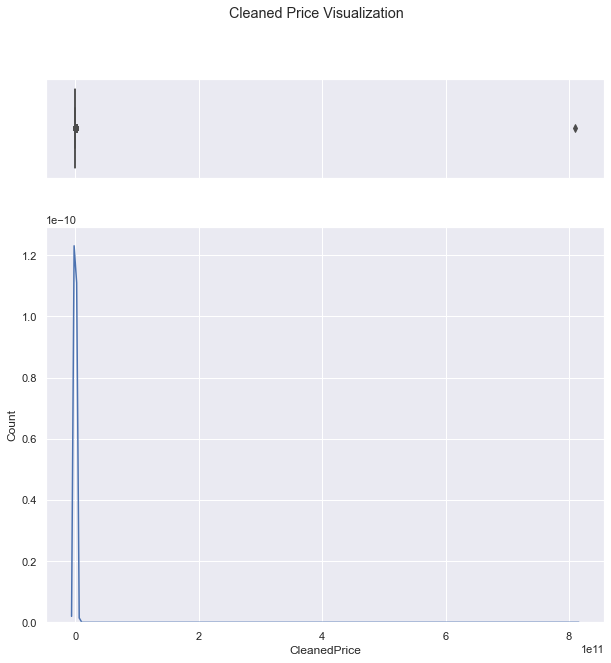

In [104]:
vis_univar (df, 'CleanedPrice')

Terdapat kejanggalan data pada boxplot cleaned price di harga 8*(10^11)

In [105]:
# Mengecek kejanggalan dari visualisasi sebelumnya
df[df['CleanedPrice']>100000000000]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000


Terdapat 1 unit yang memiliki CleanedPrice tidak masuk akal

In [106]:
# Mengecek keterkaitan antara cleanedprice yang tidak masuk akal sebelumnya dengan varibel locality MT Haryono
df[df['Locality'] == 'MT Haryono'].sort_values('CleanedPrice', ascending = False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000
994,The H Residences 2BR Fully Furnished,2,1,MT Haryono,Jakarta Timur,106.872311,-6.245309,1,64.0,Tower 1,20,IDR,114000000,114000000
5282,Signature Park Grande 2BR Fully Furnished,2,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,51.0,Tower Green,19,IDR,108000000,108000000
3765,Signature Park Grande 2BR Tower B,2,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,49.0,Tower B,19,IDR,108000000,108000000
5302,Signature Park Grande 2BR View City,2,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,42.0,Tower TA,20,IDR,108000000,108000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,Signature Park Grande Studio View City,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,0,26.0,Tower Green,17,IDR,45000000,45000000
2561,Signature Park Grande 1BR Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,24.0,Tower C,20,IDR,43500000,43500000
2405,Mt Haryono Residence 1BR Fully Furnished,1,1,MT Haryono,Jakarta Timur,106.867963,-6.243129,1,31.0,Tower 1,20,IDR,41000000,41000000
110,Mt Haryono Residence 2BR Tower 1,2,1,MT Haryono,Jakarta Timur,106.867963,-6.243129,1,30.0,Tower 1,20,IDR,40500000,40500000


In [107]:
df[df['Tower'] == 'Tower Green Signature']

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000


Tidak ada keterkaitan antara variabel locality dengan kejanggalan pada unit Signature Park Grande Studio Fully Furnished karena unit lain dengan locality yang sama dengan No_Rooms dan Bathroom yang lebih banyak memiliki harga yang jauh lebih murah dari unit Signature Park Grande Studio Fully Furnished.

Namun ada kemungkinan bahwa harga dari unit `Signature Park Grande Studio Fully Furnished` memiliki harga yang sangat besar adalah karena unit tersebut berada pada `Tower Green Signature`.	

Terdapat outlier pada kolom 1163 dimana harganya sangat jauh dengan harga semua unit lain, selain itu juga dengan harga yang sangat tinggi dengan spesifikasi yang tidak sesuai dengan harganya dimana areanya tergolong kecil dan No_rooms yang berjumlah 0.

In [108]:
# Membuang data outlier dari hasil analisis sebelumnya
df.drop([1163], inplace=True)

In [109]:
#Membuat box plot terhadap data yang outliernya sudah dibuang
def box (data, column1, column2):
    fig, (ax_box1, ax_box2) = plt.subplots(2, sharex = False, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column1, ax = ax_box1)
    sns.boxplot(data = df, x = column2, ax = ax_box2)

    fig.suptitle('CleanedPrice and No.Rooms Boxplot')
    plt.show()

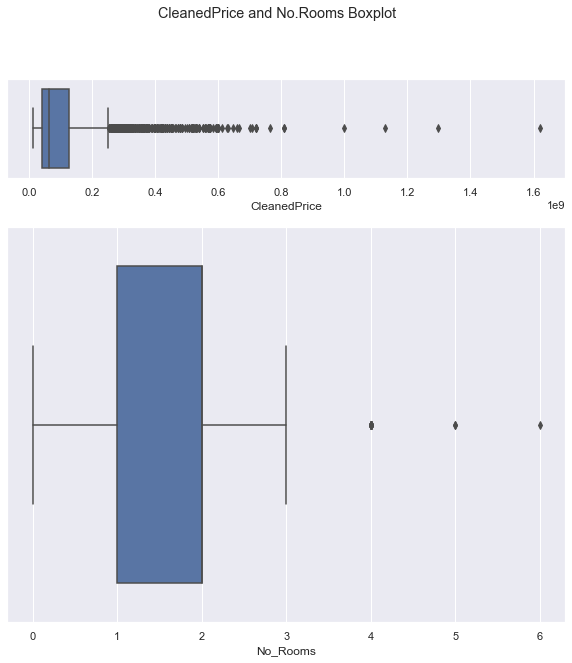

In [110]:
box(df, 'CleanedPrice', 'No_Rooms')

`CleanedPrice` : Masih terdapat banyak outlier pada data CleanedPrice pada harga diatas 0.22*(10^9), maka dari itu perlu dicek data pada outlier yang masih terdapat pada data CleanedPrice.

`No_Rooms` : Terdapat outlier untuk jumlah ruangan 4,5, dan 6. Maka dari itu perlu dicek data pada outlier yang masih terdapat pada data No_rooms.

In [111]:
# Mengecek data outlier pada CleanedPrice
df[df['CleanedPrice']> 240000000].sort_values('CleanedPrice', ascending = False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1296000000
4395,Essence Darmawangsa Apartment 3BR Tower East,3,3,Dharmawangsa,Jakarta Selatan,106.804426,-6.258746,1,322.0,Tower East,22,IDR,1128000000,1128000000
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1000000000
2042,Pakubuwono Residence 3BR Fully Furnished,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,270.0,Tower Sandalwood,24,USD,54000,810000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,The Bellagio Residence 2BR Fully Furnished,2,2,Kuningan,Jakarta Selatan,106.824194,-6.227334,1,84.0,Tower A,24,IDR,243000000,243000000
517,Belleza Apartment 2BR Tower Albergo,2,2,Permata Hijau,Jakarta Selatan,106.783318,-6.220183,1,90.0,Tower Albergo,23,IDR,243000000,243000000
3367,Casa Grande Apartment 2BR View City (Timur),2,2,Casablanca,Jakarta Selatan,106.842672,-6.224187,1,84.0,Tower Montreal,22,IDR,243000000,243000000
4156,Hamptons Park Apartment 2BR View City (Selatan),2,2,Pondok Indah,Jakarta Selatan,106.791409,-6.282965,1,92.0,Tower C,24,IDR,243000000,243000000


In [112]:
# Mengecek data outlier pada No_Rooms
df[df['No_Rooms']> 3].sort_values('CleanedPrice', ascending=False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1296000000
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1000000000
1865,La Maison Barito Apartment 5+1BR View City,5,4,Kebayoran Baru,Jakarta Selatan,106.794400,-6.246300,1,296.0,Tower Apartement,16,IDR,763600000,763600000
743,Casablanca Apartment 5BR Fully Furnished,5,4,Casablanca,Jakarta Selatan,106.845273,-6.222923,1,644.0,Tower -,24,IDR,702000000,702000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
4604,Bumi Mas Apartment 4BR Fully Furnished,4,3,Fatmawati,Jakarta Selatan,106.795177,-6.281090,1,214.0,Tower S,24,IDR,516000000,516000000
4389,Nirvana Residence 4BR Tower Ebony,4,4,Kemang,Jakarta Selatan,106.814773,-6.265249,1,303.0,Tower Ebony,23,IDR,507000000,507000000
793,Kemang Village Apartment 4+1BR Tower Cosmopolitan,4,4,Kemang,Jakarta Selatan,106.811453,-6.259374,1,240.0,Tower Cosmopolitan,22,IDR,456000000,456000000
4993,ST Moritz Apartment 4BR View City,4,3,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,204.0,Tower Presidensial,24,IDR,350000000,350000000


Terdapat kejanggalan dimana untuk jumlah ruangan yang paling banyak ternyata tidak menunjukan harga tertinggi. 

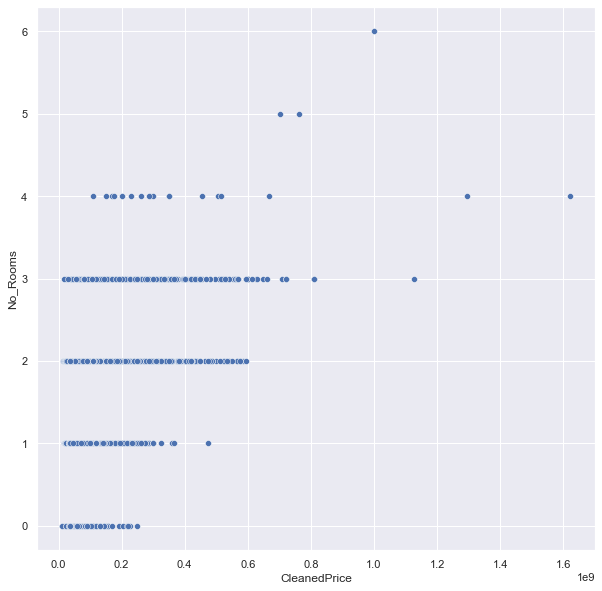

In [113]:
#M Melakukan visualisasi antara No_Rooms dengan CleanedPrice menggunakan scatterplot untuk mengetahui hubungannya.
ax = sns.scatterplot(data = df, y='No_Rooms', x = 'CleanedPrice')
plt.show() 

Terdapat kejanggalan pada No_Rooms berjumlah 6 dan 5 dimana harganya berada dibawah dengan unit yang memiliki jumlah ruangan 3 dan 4

In [114]:
df[(df['Locality'] == 'Pakubuwono') | (df['Locality'] == 'SCBD')].sort_values('CleanedPrice', ascending= False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1296000000
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000,810000000
2042,Pakubuwono Residence 3BR Fully Furnished,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,270.0,Tower Sandalwood,24,USD,54000,810000000
4680,Pakubuwono Residence 3BR Tower Cotton Wood,3,2,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,245.0,Tower Cotton Wood,24,USD,48000,720000000
1652,The Capital Residences 3BR Fully Furnished,3,2,SCBD,Jakarta Selatan,106.811290,-6.225663,1,171.0,Tower 1,21,IDR,601100000,601100000
1278,The Capital Residences 3BR Fully Furnished,3,2,SCBD,Jakarta Selatan,106.811290,-6.225663,1,170.0,Tower I,21,IDR,599400000,599400000
2963,The Capital Residences 3BR Fully Furnished,3,2,SCBD,Jakarta Selatan,106.811290,-6.225663,1,170.0,Tower 2,21,IDR,599400000,599400000
2804,The Capital Residences 3BR Tower I,3,2,SCBD,Jakarta Selatan,106.811290,-6.225663,1,170.0,Tower I,21,IDR,599400000,599400000
2245,The Capital Residences 3BR View Pool (Selatan),3,2,SCBD,Jakarta Selatan,106.811290,-6.225663,1,170.0,Tower I,20,IDR,599400000,599400000


In [115]:
df[(df['CleanedPrice'] > 1200000000) | (df['No_Rooms'] > 3)].sort_values('CleanedPrice', ascending=False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1296000000
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1000000000
1865,La Maison Barito Apartment 5+1BR View City,5,4,Kebayoran Baru,Jakarta Selatan,106.794400,-6.246300,1,296.0,Tower Apartement,16,IDR,763600000,763600000
743,Casablanca Apartment 5BR Fully Furnished,5,4,Casablanca,Jakarta Selatan,106.845273,-6.222923,1,644.0,Tower -,24,IDR,702000000,702000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
4604,Bumi Mas Apartment 4BR Fully Furnished,4,3,Fatmawati,Jakarta Selatan,106.795177,-6.281090,1,214.0,Tower S,24,IDR,516000000,516000000
4389,Nirvana Residence 4BR Tower Ebony,4,4,Kemang,Jakarta Selatan,106.814773,-6.265249,1,303.0,Tower Ebony,23,IDR,507000000,507000000
793,Kemang Village Apartment 4+1BR Tower Cosmopolitan,4,4,Kemang,Jakarta Selatan,106.811453,-6.259374,1,240.0,Tower Cosmopolitan,22,IDR,456000000,456000000
4993,ST Moritz Apartment 4BR View City,4,3,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,204.0,Tower Presidensial,24,IDR,350000000,350000000


Kejanggalan pada unit dengan jumlah ruangan 4 yang memiliki harga cukup jauh dengan harga unit yang memiliki jumlah ruangan 5 dan 6 dimungkinkan karena faktor lain yang menyebabkan harganya cukup jauh dengan unit dengan jumlah ruangan 5 dan 6. Faktor yang dapat mempengaruhi kejanggalan tersebut dapat berasal dari jumlah bathroom, luas area, total facilities, dan locality.

#### 3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda.

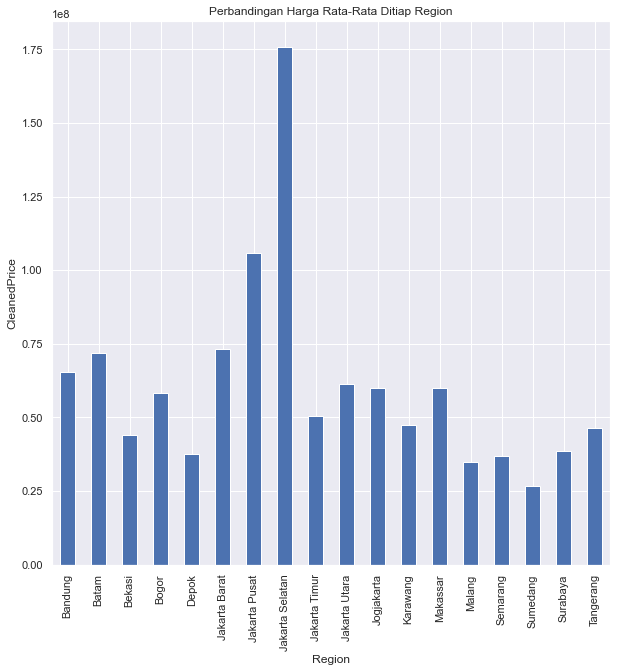

In [116]:
# Melakukan mengelompokkan pada region terhadap mean dari CleanedPrice. 
# Lalu dilakukan visualisasi berupa barplot untuk melihat perbandingan rata-rata harga dari tiap region.
df.groupby('Region', as_index=False).agg({'CleanedPrice':['mean']}
).plot(x= 'Region', y = ('CleanedPrice', 'mean'), kind = 'bar', legend = False)

plt.title('Perbandingan Harga Rata-Rata Ditiap Region')
plt.ylabel('CleanedPrice')
plt.show()

Dari grafik diatas dapat dilihat bahwa unit yang memiliki harga paling tinggi rata-rata berada pada daerah jakarta selatan.

#### 4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Longitude', ylabel='(Latitude, count)'>

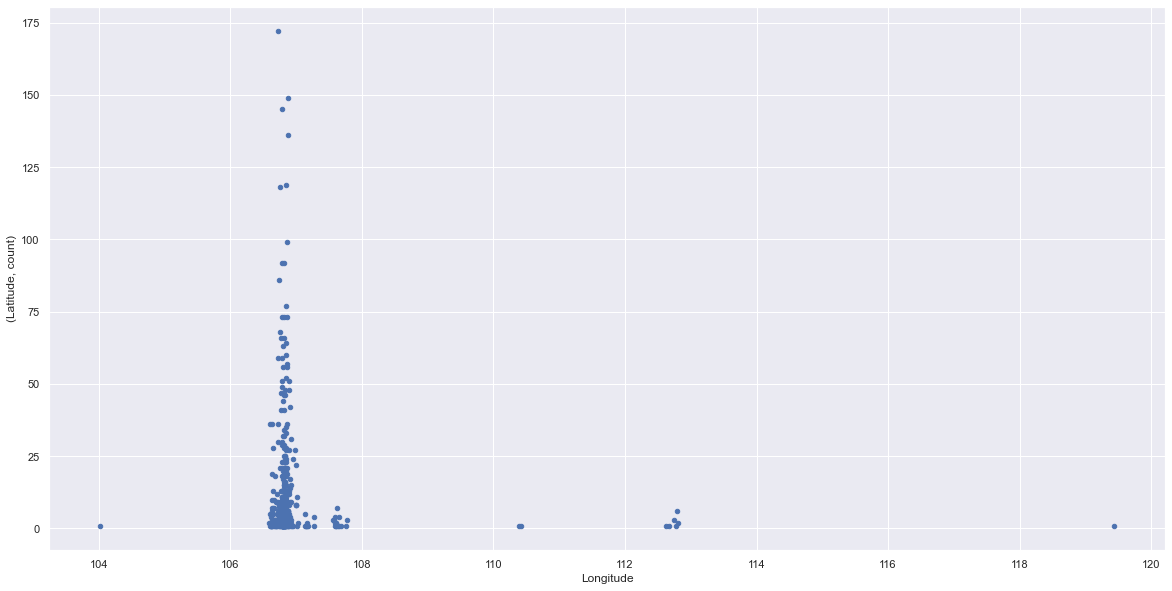

In [128]:
#Melakukan visualisasi terkait jumlah latitude terhadap setiap nilai longitude
df.groupby('Longitude',as_index=False).agg({'Latitude':['count']}).plot(x = 'Longitude', y = (('Latitude','count')),kind = 'scatter', figsize = (20,10))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Latitude', ylabel='(Longitude, count)'>

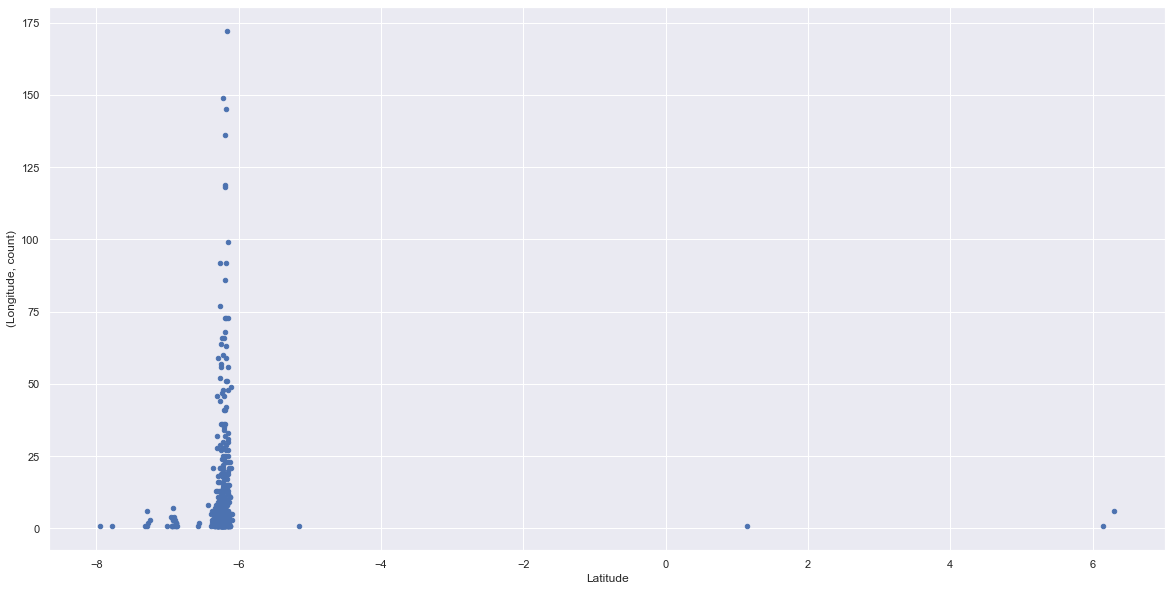

In [129]:
#Melakukan visualisasi terkait jumlah longitude terhadap setiap nilai latitude
df.groupby('Latitude',as_index=False).agg({'Longitude':['count']}).plot(x = 'Latitude', y = (('Longitude','count')),kind = 'scatter', figsize = (20,10))

In [137]:
#melihat duplikasi pada kolom longitude dan latitude
df[['Longitude','Latitude']].duplicated().sum()

4948

Dari dua grafik diatas dapat dilihat bahwa cukup banyak data yang terduplikasi pada bagian longitude dan latitude. Asumsi tersebut diperkuat dengan jumlah duplikasi yang sangat banyak dengan jumlah 4948 dari coding diatas. Kesalahan ini dapat diterima karena mungkin saja pada satu koordinat yang sama merupakan perumahan yang memiliki banyak unit apartemen, sehingga menjadikan kolom longitude dan latitude terdapat banyak duplikat.